In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing import image

In [ ]:
# Path directory
train_dir = "/content/drive/MyDrive/Tugas Akhir BISA.AI Kelompok 6/images/train"
validation_dir = "/content/drive/MyDrive/Tugas Akhir BISA.AI Kelompok 6/images/validation"

In [ ]:
# Generator function for training
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  train_datagen = ImageDataGenerator(rescale=1./255.,
                                     rotation_range=60,
                                    #  width_shift_range=0.2,
                                    #  height_shift_range=0.2,
                                    #  shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')

  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=10,
                                                      class_mode='categorical',
                                                      target_size=(224, 224))

  validation_datagen = ImageDataGenerator(rescale=1./255.)

  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=10,
                                                                class_mode='categorical',
                                                                target_size=(224, 224))
  return train_generator, validation_generator

In [ ]:
train_generator, validation_generator = train_val_generators(train_dir, validation_dir)

Found 398 images belonging to 10 classes.
Found 101 images belonging to 10 classes.


In [ ]:
# Set efficient net transfer learning
efficientnet = "https://tfhub.dev/google/efficientnet/b0/feature-vector/1"

In [ ]:
# Create model object
model = tf.keras.Sequential([
    hub.KerasLayer(efficientnet, trainable=False),  # Set trainable=False to keep the pre-trained weights fixed
])

In [ ]:
# Add layers to model
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Create callbacks
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99):
      print("\nUdah 99% akurasinya!")
      self.model.stop_training = True

In [ ]:
# Try modelling
callbacks = myCallback()
history = model.fit(train_generator,
                    steps_per_epoch=4,
                    epochs=100,
                    validation_data=validation_generator,
                    callbacks=callbacks)

Epoch 1/100
4/4 [==============================] - 14s 3s/step - loss: 2.2000 - accuracy: 0.1500 - val_loss: 1.7759 - val_accuracy: 0.4059
Epoch 2/100
4/4 [==============================] - 13s 4s/step - loss: 1.5447 - accuracy: 0.4500 - val_loss: 1.3832 - val_accuracy: 0.6634
Epoch 3/100
4/4 [==============================] - 13s 4s/step - loss: 0.9476 - accuracy: 0.7000 - val_loss: 1.1395 - val_accuracy: 0.7030
Epoch 4/100
4/4 [==============================] - 14s 4s/step - loss: 1.7410 - accuracy: 0.5000 - val_loss: 0.7784 - val_accuracy: 0.7525
Epoch 5/100
4/4 [==============================] - 15s 5s/step - loss: 0.5512 - accuracy: 0.8500 - val_loss: 0.6112 - val_accuracy: 0.8911
Epoch 6/100
4/4 [==============================] - 14s 4s/step - loss: 0.6459 - accuracy: 0.8000 - val_loss: 0.5774 - val_accuracy: 0.8515
Epoch 7/100
4/4 [==============================] - 14s 5s/step - loss: 0.6383 - accuracy: 0.8500 - val_loss: 0.4356 - val_accuracy: 0.9010
Epoch 8/100
4/4 [==========

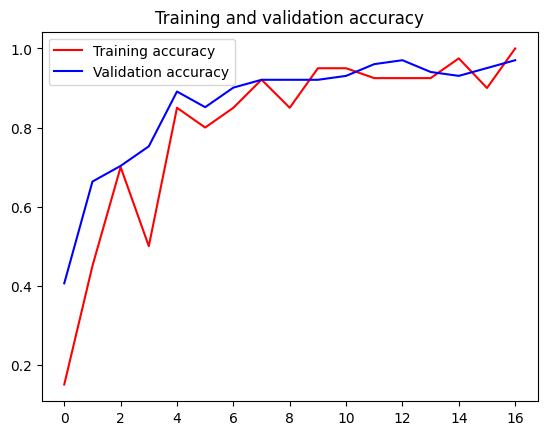

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plot the training and validation accuracies for each epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

In [ ]:
''' Ini buat save modelnya '''

# # Specify the file path to save the model
# model_path = 'model_efficient_net.h5'

# # Save the model
# model.save(model_path)

' Ini buat save modelnya '

In [ ]:
''' Ini buat ngetes hasilnya '''

# testing_dir = 'blom ada'
# class_labels = ['sate_ayam',
#                 'ayam_betutu',
#                 'lemang',
#                 'rawon',
#                 'kerak_telor',
#                 'gado_gado',
#                 'bika_ambon',
#                 'ayam_pop',
#                 'pempek',
#                 'rendang'
#                 ]

# # Load and preprocess the image
# for filename in testing_dir:
#     if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
#         img = image.load_img((testing_dir, filename), target_size=(224, 224))
#         x = image.img_to_array(img)
#         x = np.expand_dims(x, axis=0)
#         x = x / 255.0
#         predictions = model.predict(x)
#         predicted_class_index = np.argmax(predictions[0])
#         predicted_class_label = class_labels[predicted_class_index]
#         print(f"The prediction of {filename} is {predicted_class_label} : {np.max(predictions[0])}")

' Ini buat ngetes hasilnya '